[論文](../memo/先行研究/外来語略語の形成についての史的研究.md)の追試

In [98]:
from type import Abbreviation, Mora, Syllable
import json
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import numpy as np

In [99]:
# 前処理した略語データを読み込む
data = list(map(Abbreviation.model_validate, json.load(open("./data/abbreviation.json", "r"))))

## 単語型略語

In [100]:
# 単語型略語を絞り込む
data_one = [w for w in data if len(w.word_element_list) == 1]

### 規則： 前部保留が多い

場所に着目した規則

ここではモーラで考える

In [101]:
pre: list[int] = []
post: list[int] = []
for abb in data_one:
    pre_cnt = 0
    for i in range(len(abb.abbreviation_element_list[0].mora_list)):
        if abb.abbreviation_element_list[0].mora_list[i] == abb.word_element_list[0].mora_list[i]:
            pre_cnt += 1
        else:
            break
    pre.append(pre_cnt)
    post_cnt = 0
    for i in range(len(abb.abbreviation_element_list[0].mora_list)):
        if abb.abbreviation_element_list[0].mora_list[-i - 1] == abb.word_element_list[0].mora_list[-i - 1]:
            post_cnt += 1
        else:
            break
    post.append(post_cnt)

pre = np.array(pre, dtype=int)
post = np.array(post, dtype=int)

In [102]:
print("前部保留", pre[pre > post].shape[0])
print("後部保留", post[post > pre].shape[0])

前部保留 303
後部保留 25


前部保留が圧倒的に多いことがわかった  
ちょうど12倍おおい

次に前部保留、後部保留で何モーラの略語になっているかを調べる

前部後部ともに2モーラの略語が多い。これは次の略語生成規則の内容と合致する

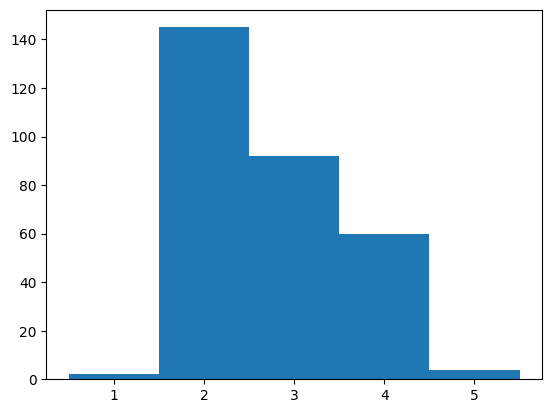

In [103]:
pre_cnt = Counter(pre[pre > post])
plt.bar(pre_cnt.keys(), pre_cnt.values(), width=1)
plt.show()

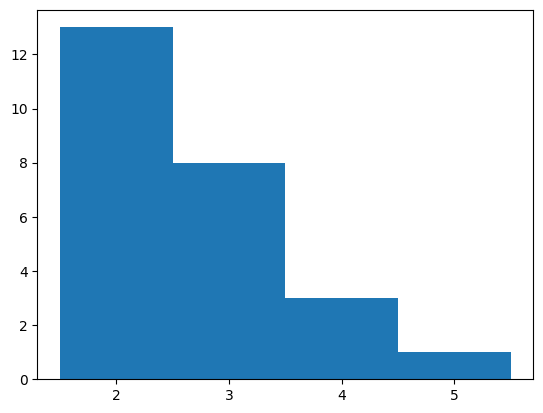

In [104]:
post_cnt = Counter(post[post > pre])
plt.bar(sorted(map(str, post_cnt.keys())), post_cnt.values(), width=1)
plt.show()

### 規則： 2音節の略語が多い

音の長さに着目した規則

音節とモーラの長さを調べる

In [105]:
syllable_len = np.array([len(abb.abbreviation_element_list[0].syllable_list) for abb in data_one])
mora_len = np.array([len(abb.abbreviation_element_list[0].mora_list) for abb in data_one])

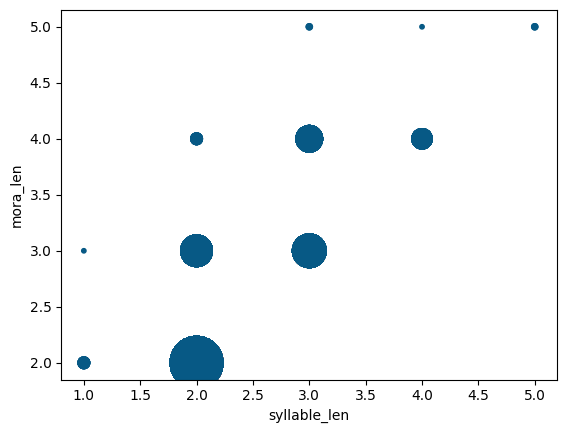

In [106]:
size_d = defaultdict(int)
for i in range(len(mora_len)):
    size_d[(syllable_len[i], mora_len[i])] += 1
size = np.array([size_d[(syllable_len[i], mora_len[i])] for i in range(len(mora_len))])
plt.scatter(syllable_len, mora_len, s=size * 10, c="#075985")
plt.xlabel("syllable_len")
plt.ylabel("mora_len")
plt.show()

論文の記述通り、2音節2モーラの略語が多い

2音節3モーラ略語の2モーラ目には、特殊モーラがきやすい

っていっても特殊モーラが来るとすれば2か3のどちらかなんだけど

In [107]:
# 2音節3モーラの略語
data_23 = [data_one[i] for i in range(len(mora_len)) if syllable_len[i] == 2 and mora_len[i] == 3]

In [108]:
first_mora_cnt = Counter([str(abb.abbreviation_element_list[0].mora_list[0]) for abb in data_23])
second_mora_cnt = Counter([str(abb.abbreviation_element_list[0].mora_list[1]) for abb in data_23])
third_mora_cnt = Counter([str(abb.abbreviation_element_list[0].mora_list[2]) for abb in data_23])

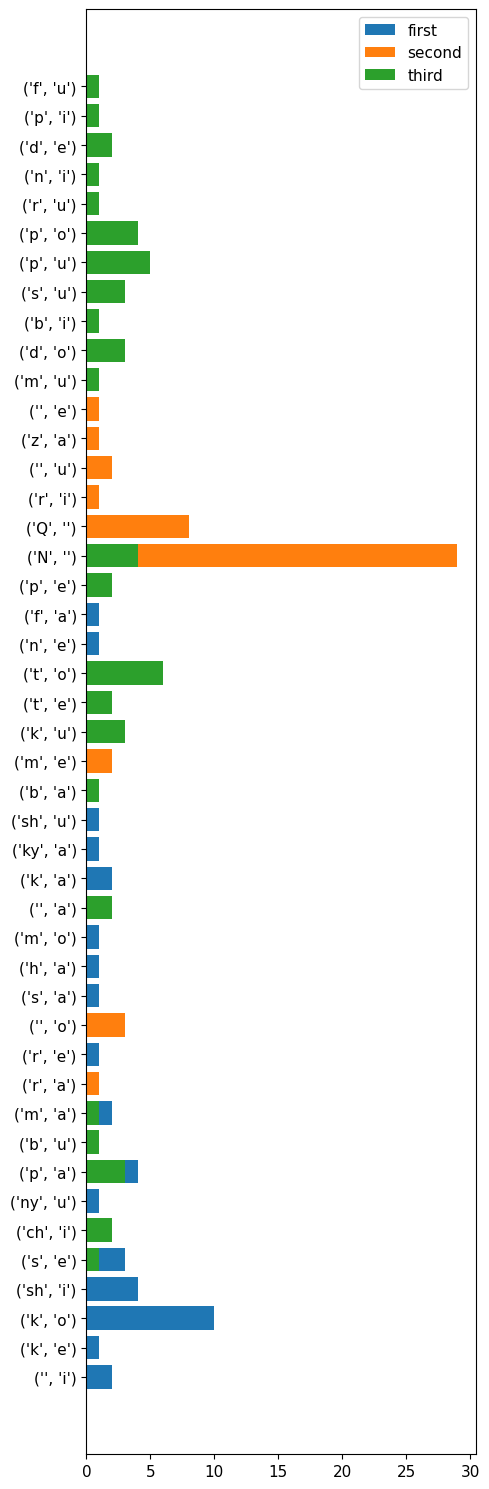

In [109]:
plt.figure(figsize=(5, 15))
plt.barh(first_mora_cnt.keys(), first_mora_cnt.values())
plt.barh(second_mora_cnt.keys(), second_mora_cnt.values())
plt.barh(third_mora_cnt.keys(), third_mora_cnt.values())
plt.tick_params(labelsize=11)
plt.legend(["first", "second", "third"], fontsize=11)
plt.tight_layout()
plt.show()

### 規則： 4音節の略語も増えてきている

元論文は略語の形成について明治時代から歴史的に研究しているので「増えてきている」という表現になっている

In [110]:
data_4mu = [data_one[i] for i in range(len(data_one)) if mora_len[i] == 4]

In [111]:
data_4mu

[Abbreviation(アスパラガス -> アスパラ),
 Abbreviation(コールタール -> コールタ),
 Abbreviation(コンキュウバイン -> コンキュウ),
 Abbreviation(コンクリート -> コンクリ),
 Abbreviation(ハンカチーフ -> ハンカチ),
 Abbreviation(コンミッション -> ミッション),
 Abbreviation(アパートメント -> アパート),
 Abbreviation(ウイスキー -> イスキー),
 Abbreviation(インテリゲンチャ -> インテリ),
 Abbreviation(インドロップ -> インドロ),
 Abbreviation(コックスエーン -> コックス),
 Abbreviation(ハイポーサルファイト -> ハイポー),
 Abbreviation(アナクロニズム -> アナクロ),
 Abbreviation(アレンジメント -> アレンジ),
 Abbreviation(イミグレーション -> イミグレ),
 Abbreviation(イラストレーション -> イラスト),
 Abbreviation(インストラクション -> インスト),
 Abbreviation(インターナショナル -> インター),
 Abbreviation(インターチェンジ -> インター),
 Abbreviation(インフレーション -> インフレ),
 Abbreviation(イントロダクション -> イントロ),
 Abbreviation(エキスポジション -> エキスポ),
 Abbreviation(オートメーション -> オートメ),
 Abbreviation(コンパチブル -> コンパチ),
 Abbreviation(サドマゾヒズム -> サドマゾ),
 Abbreviation(シンクロナイズ -> シンクロ),
 Abbreviation(デュープリケート -> デュープ),
 Abbreviation(ジステンパー -> テンパー),
 Abbreviation(トランスフオーマー -> トランス),
 Abbreviation(ハイドロキノン -> ハイドロ),
 Abbreviation(ハイドロリック -> ハ

## 複合語略語

In [112]:
# 単語型略語を絞り込む
data_compound = [w for w in data if len(w.word_element_list) >= 2]

### 規則： 原語の前部を保留することが多い

原語の前部要素と略語が完全一致するものを数えてみる

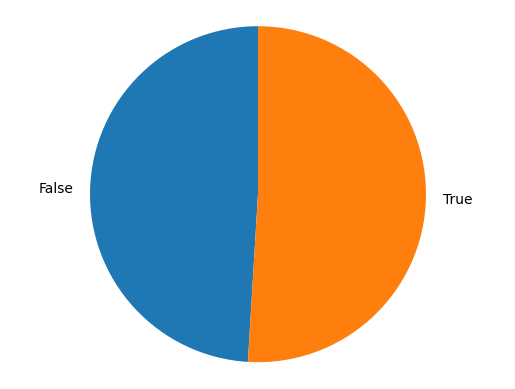

In [136]:
is_front_eq = [str(abb.word_element_list[0].text.startswith(abb.abbreviation)) for abb in data_compound]
cnt = Counter(is_front_eq)
plt.pie(list(reversed(cnt.values())), labels=list(reversed(cnt.keys())), startangle=90)
plt.axis("equal")
plt.show()

半数弱がそのような形であった

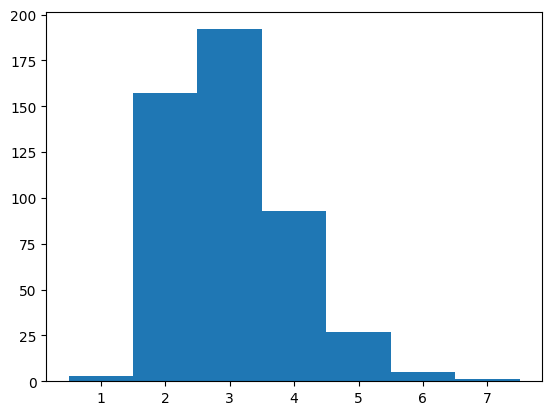

In [137]:
front_only = [abb for abb in data_compound if abb.word_element_list[0].text.startswith(abb.abbreviation)]
front_only_syllable_cnt_by_len = Counter([len(abb.abbreviation_element_list[0].syllable_list) for abb in front_only])
plt.bar(front_only_syllable_cnt_by_len.keys(), front_only_syllable_cnt_by_len.values(), width=1)
plt.show()

In [138]:
front_only

[Abbreviation(アイボリー・ナット -> アイボリー),
 Abbreviation(アネロイド・バロメーター -> アネロイド),
 Abbreviation(アパートメント・ハウス -> アパートメント),
 Abbreviation(アルミニウム・ブロンズ -> アルミ),
 Abbreviation(アンクル・エスケープメント -> アンクル),
 Abbreviation(エレヴェーテッド・レールヴェー -> エレヴェーテッド),
 Abbreviation(オーバー・コート -> オーバー),
 Abbreviation(オート・モビル -> オート),
 Abbreviation(オリンピック・ゲーム -> オリンピック),
 Abbreviation(オレンヂ・エロー -> オレンヂ),
 Abbreviation(ガイド・ブック -> ガイド),
 Abbreviation(キネマト・グラフ -> キネマ),
 Abbreviation(コーチ・ヤード -> コーチ),
 Abbreviation(コール・マネー -> コール),
 Abbreviation(コール・ローン -> コール),
 Abbreviation(サード・クラス -> サード),
 Abbreviation(サード・ベース -> サード),
 Abbreviation(ショート・ストップ -> ショート),
 Abbreviation(スクリュー・プロペラー -> スクリュー),
 Abbreviation(ステーム・パイプ -> ステーム),
 Abbreviation(ステロ・タイプ -> ステロ),
 Abbreviation(センター・フィルダー -> センター),
 Abbreviation(タングステン・ランプ -> タングステン),
 Abbreviation(ダブル・カラー -> ダブル),
 Abbreviation(ニューズ・ペーパー -> ニューズ),
 Abbreviation(ネーブル・オレンジ -> ネーブル),
 Abbreviation(ネット・プライス -> ネット),
 Abbreviation(ノート・ブック -> ノート),
 Abbreviation(パス・ボール -> パス),
 Abbreviation(パツキング・ペ

### 規則： 2モーラ・2モーラの複合型も多い

In [114]:
# 略語も2要素に分かれているもの
data_abb_compound2 = [abb for abb in data_compound if len(abb.abbreviation_element_list) >= 2]

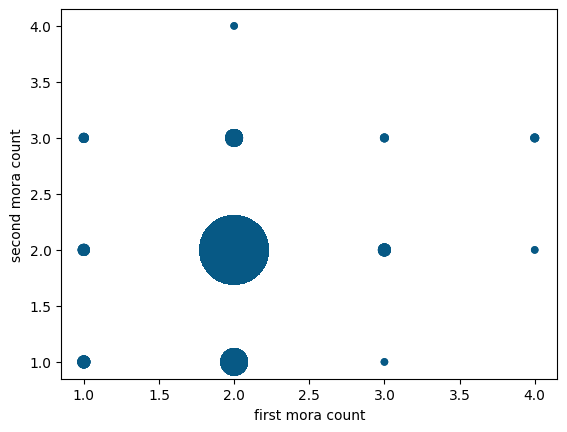

In [115]:
elem1_mora_cnt = [len(abb.abbreviation_element_list[0].mora_list) for abb in data_abb_compound2]
elem2_mora_cnt = [len(abb.abbreviation_element_list[1].mora_list) for abb in data_abb_compound2]
size_d = defaultdict(int)
for i in range(len(data_abb_compound2)):
    size_d[(elem1_mora_cnt[i], elem2_mora_cnt[i])] += 1
size = np.array([size_d[(elem1_mora_cnt[i], elem2_mora_cnt[i])] for i in range(len(data_abb_compound2))])

plt.scatter(elem1_mora_cnt, elem2_mora_cnt, s=size * 10, c="#075985")
plt.xlabel("first mora count")
plt.ylabel("second mora count")
plt.show()

確かに2モーラ・2モーラの形が多い

次は1,2や2,1になっている部分の1の次は特殊モーラが気ていることが多いということを確かめる

In [120]:
front1 = [abb for abb in data_abb_compound2 if len(abb.abbreviation_element_list[0].mora_list) == 1 and len(abb.abbreviation_element_list[1].mora_list) == 2]
back1 = [abb for abb in data_abb_compound2 if len(abb.abbreviation_element_list[1].mora_list) == 1 and len(abb.abbreviation_element_list[0].mora_list) == 2]

In [121]:
front1_omitted_mora: list[str] = []
for abb in front1:
    w_mora_list = abb.word_element_list[0].mora_list
    mora = abb.abbreviation_element_list[0].mora_list[0]
    for i in range(len(w_mora_list)):
        if w_mora_list[i] == mora:
            front1_omitted_mora.append(str(w_mora_list[i + 1]))
            break

back1_omitted_mora: list[Mora] = []
for abb in back1:
    w_mora_list = abb.word_element_list[1].mora_list
    mora = abb.abbreviation_element_list[1].mora_list[0]
    for i in range(len(w_mora_list)):
        if w_mora_list[i] == mora:
            if i == len(w_mora_list) - 1:
                back1_omitted_mora.append(str(Mora(consonant="", vowel="")))
            else:
                back1_omitted_mora.append(str(w_mora_list[i + 1]))
            break

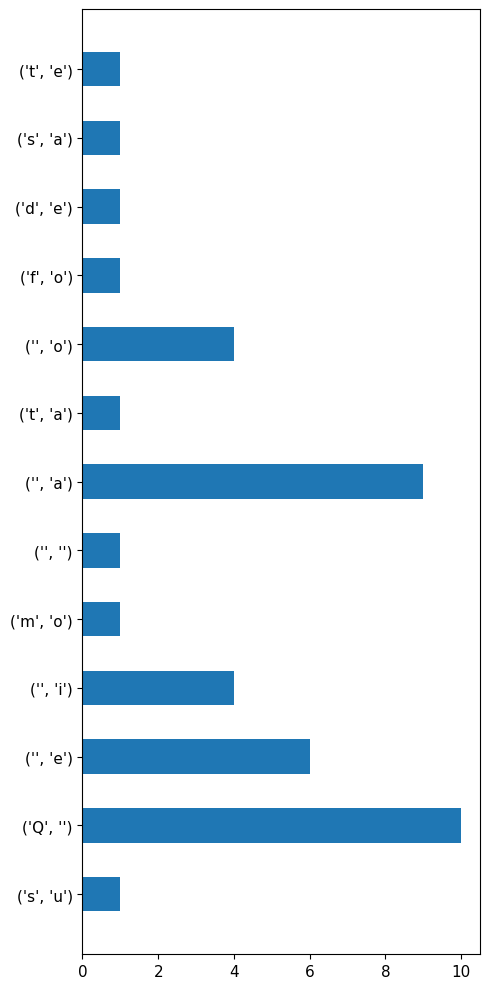

In [122]:
omitted_mora_cnt = Counter(front1_omitted_mora + back1_omitted_mora)
plt.figure(figsize=(5, 10))
plt.barh(omitted_mora_cnt.keys(), omitted_mora_cnt.values(), height=0.5)
plt.tick_params(labelsize=11)
plt.tight_layout()
plt.show()

省略されやすい単語は、促音と母音（おそらく長音）だった

In [125]:
back1

[Abbreviation(アジテート・ポイント -> アジ・ト),
 Abbreviation(カンニング・ペーパー -> カン・ペ),
 Abbreviation(テレホン・カード -> テレ・カ),
 Abbreviation(ドレス・メーキング -> ドレ・メ),
 Abbreviation(アコースティック・ギター -> アコ・ギ),
 Abbreviation(アメリカン・ショートヘア -> アメ・ショ),
 Abbreviation(エゴ・サーチ -> エゴ・サ),
 Abbreviation(オフライン・ミーティング -> オフ・ミ),
 Abbreviation(グラフィック・ボード -> グラ・ボ),
 Abbreviation(グループ・チャット -> グル・チャ),
 Abbreviation(クレジット・カード -> クレ・カ),
 Abbreviation(コスト・パフォーマンス -> コス・パ),
 Abbreviation(コミック・マーケット -> コミ・ケ),
 Abbreviation(スクリーン・ショット -> スク・ショ),
 Abbreviation(スクール・バック -> スク・バ),
 Abbreviation(スター・バックスコーヒー -> スタ・バ),
 Abbreviation(ステルス・マーケティング -> ステ・マ),
 Abbreviation(スノー・ボード -> スノ・ボ),
 Abbreviation(スーパー・モデル -> スパ・モ),
 Abbreviation(デコ・メール -> デコ・メ),
 Abbreviation(トラック・バック -> トラ・バ),
 Abbreviation(トレーティング・カード -> トレ・カ),
 Abbreviation(ネット・アイドル -> ネト・ア),
 Abbreviation(ネット・ゲーム -> ネト・ゲ),
 Abbreviation(ハイ・ソサエティー -> ハイ・ソ),
 Abbreviation(ハロー・ワーク -> ハロ・ワ),
 Abbreviation(ブック・マーク -> ブク・マ),
 Abbreviation(フリー・マーケット -> フリ・マ),
 Abbreviation(ペン・ポーチ -> ペン・ポ),
 Abbrevia